In [1]:
import pandas as pd
# from mordred import Calculator, descriptors

from rdkit.Chem import Draw, MolToSmiles, MolFromSmiles
from venn import venn
import matplotlib.pyplot as plt

In [2]:
# load datasets pickle from ../data/standardized_data

chemdiv_rna = pd.read_pickle('../data/standardized_data/chemdiv_df.pkl')
enamine_rna = pd.read_pickle('../data/standardized_data/enamine_rna_df.pkl')
enamine_protein = pd.read_pickle('../data/standardized_data/enamine_protein_df.pkl')
life_chemicals = pd.read_pickle('../data/standardized_data/life_chemicals_df.pkl')
robin_df = pd.read_pickle('../data/standardized_data/robin_df.pkl')

In [3]:
# for each dataset create a column source, which will be used to identify the source of the molecule

chemdiv_rna['source'] = 'Chemdiv_RNA'
enamine_rna['source'] = 'Enamine_RNA'
enamine_protein['source'] = 'Enamine_Protein'
life_chemicals['source'] = 'Life_chemicals_RNA'
robin_df['source'] = 'ROBIN_RNA'


In [4]:
# calculate canonical SMILES for each dataset using 'mol' column
chemdiv_rna['SMILES'] = chemdiv_rna['mol'].apply(MolToSmiles, canonical=True)
enamine_rna['SMILES'] = enamine_rna['mol'].apply(MolToSmiles, canonical=True)
enamine_protein['SMILES'] = enamine_protein['mol'].apply(MolToSmiles, canonical=True)
life_chemicals['SMILES'] = life_chemicals['mol'].apply(MolToSmiles, canonical=True)
robin_df['SMILES'] = robin_df['mol'].apply(MolToSmiles, canonical=True)

# create a list of all datasets
datasets = [chemdiv_rna, enamine_rna, enamine_protein, life_chemicals, robin_df]

In [5]:
# create folder venn_diagrams to save venn diagrams
import os
if not os.path.exists('../output/venn_diagrams/v2'):
    os.makedirs('../output/venn_diagrams/v2')

In [6]:

def read_smiles(dataframe):
    return set(dataframe['SMILES'])

# Read the SMILES from each DataFrame and store them in separate variables
library1 = read_smiles(enamine_protein)
library2 = read_smiles(life_chemicals)
library3 = read_smiles(chemdiv_rna)
library4 = read_smiles(enamine_rna)
library5 = read_smiles(robin_df)

# Create a merged library from libraries 2, 3, 4, and 5
merged_library = library2.union(library3, library4, library5)

# Calculate intersections and store duplicates for the first Venn Diagram
intersections_1 = {
    "RNA-Targeted Life Chemicals & RNA-Targeted Chemdiv": library2.intersection(library3),
    "RNA-Targeted Life Chemicals & RNA-Targeted Enamine": library2.intersection(library4),
    "RNA-Targeted Life Chemicals & RNA-Targeted ROBIN": library2.intersection(library5),
    "RNA-Targeted Chemdiv & RNA-Targeted ROBIN": library3.intersection(library5),
    "RNA-Targeted Enamine & RNA-Targeted ROBIN": library4.intersection(library5),
    "RNA-Targeted Chemdiv & RNA-Targeted Enamine": library3.intersection(library4),
    "RNA-Targeted Chemdiv & RNA-Targeted Enamine & RNA-Targeted ROBIN": library3.intersection(library4, library5),
    "RNA-Targeted Life Chemicals & RNA-Targeted Chemdiv & RNA-Targeted Enamine": library2.intersection(library3, library4),
    "RNA-Targeted Life Chemicals & RNA-Targeted Chemdiv & RNA-Targeted ROBIN": library2.intersection(library3, library5),
    "RNA-Targeted Life Chemicals & RNA-Targeted Enamine & RNA-Targeted ROBIN": library2.intersection(library4, library5),
    "RNA-Targeted Chemdiv & RNA-Targeted Enamine & RNA-Targeted ROBIN": library3.intersection(library4, library5),
    "RNA-Targeted Life Chemicals & RNA-Targeted Chemdiv & RNA-Targeted Enamine & RNA-Targeted ROBIN": library2.intersection(library3, library4, library5),
    "All Libraries": library2.intersection(library3, library4, library5),
}

# Save duplicates information as pickled DataFrames for each intersection in the first Venn Diagram
for key, value in intersections_1.items():
    mols = [MolFromSmiles(smiles) for smiles in value]
    duplicates_1 = pd.DataFrame({"mol": mols, "SMILES": list(value)})
    pickle_file_name = f"venn_intersections_1_{key.replace(' ', '_')}.pkl"
    duplicates_1.to_pickle(f'../output/venn_diagrams/v2/{pickle_file_name}')

# Create the first Venn diagram
dataset_dict_1 = {
    "RNA-Targeted Life Chemicals": library2,
    "RNA-Targeted Chemdiv": library3,
    "RNA-Targeted Enamine": library4,
    "RNA-Targeted ROBIN": library5,
}
venn(dataset_dict_1, fmt="{size}", cmap="viridis")

# Save the first figure
plt.savefig('../output/venn_diagrams/v2/venn_diagram_1.png', dpi=400)

plt.clf()  # clear figure for next plot

# Calculate intersections and store duplicates for the second Venn Diagram
intersections_2 = {
    "Protein-Targeted Enamine & Merged RNA-Targeted Libraries": library1.intersection(merged_library),
}

# Save duplicates information as a pickled DataFrame for the second Venn Diagram
for key, value in intersections_2.items():
    mols = [MolFromSmiles(smiles) for smiles in value]
    duplicates_2 = pd.DataFrame({"mol": mols, "SMILES": list(value)})
    pickle_file_name = f"venn_intersections_2_{key.replace(' ', '_')}.pkl"
    duplicates_2.to_pickle(f'../output/venn_diagrams/v2/{pickle_file_name}')



# Create the second Venn diagram
dataset_dict_2 = {
    "Protein-Targeted Enamine": library1,
    "Merged RNA-Targeted Libraries": merged_library,
}
venn(dataset_dict_2, fmt="{size}", cmap="viridis")

# Save the second figure
plt.savefig('../output/venn_diagrams/v2/venn_diagram_2.png', dpi=600)
plt.clf()  # clear figure for next plot


<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

In [7]:
# now I need to create a merged dataframe chemdiv+enamine and create a venn diagram with life_chemicals and robin and the merged dataframe

# merge chemdiv and enamine
merged_chemdiv_enamine = pd.concat([chemdiv_rna, enamine_rna], ignore_index=True)

# calculate canonical SMILES for the merged dataframe
merged_chemdiv_enamine['SMILES'] = merged_chemdiv_enamine['mol'].apply(MolToSmiles, canonical=True)

# Read the SMILES from the merged DataFrame and store them in a variable
library6 = read_smiles(merged_chemdiv_enamine)

# Calculate intersections of the merged DataFrame with libraries 2 and 5
intersections_3 = {
    "RNA-Targeted Life Chemicals & Merged RNA-Targeted Libraries": library2.intersection(library6),
    "RNA-Targeted ROBIN & Merged RNA-Targeted Libraries": library5.intersection(library6),
    "RNA-Targeted Life Chemicals & RNA-Targeted ROBIN & Merged RNA-Targeted Libraries": library2.intersection(library5, library6),
}

# Save duplicates information as pickled DataFrames for each intersection in the third Venn Diagram
for key, value in intersections_3.items():
    mols = [MolFromSmiles(smiles) for smiles in value]
    duplicates_3 = pd.DataFrame({"mol": mols, "SMILES": list(value)})
    pickle_file_name = f"venn_intersections_3_{key.replace(' ', '_')}.pkl"
    duplicates_3.to_pickle(f'../output/venn_diagrams/v2/{pickle_file_name}')
    
    
# Create the third Venn diagram
dataset_dict_3 = {
    "RNA-Targeted Life Chemicals": library2,
        "RNA-Targeted Merged Chemdiv & Enamine": library6,
    "RNA-Targeted ROBIN": library5,
}

venn(dataset_dict_3, fmt="{size}", cmap="viridis")

# Save the third figure
plt.savefig('../output/venn_diagrams/v2/venn_diagram_3.png', dpi=600)
plt.clf()  # clear figure for next plot



<Figure size 800x800 with 0 Axes>

In [8]:
# save all intersections as txt file with smiles to one file
all_intersections = {**intersections_1, **intersections_2, **intersections_3}

with open('../output/venn_diagrams/v2/all_intersections.txt', 'w') as f:
    for key, value in all_intersections.items():
        f.write(f'{key}\n')
        for item in value:
            f.write(f'{item}\n')
        f.write('\n\n\n')


In [9]:
# load datasets pickle venn_intersections_1.pkl from ../data/standardized_data
venn_intersections_1_all = pd.read_pickle('../output/venn_diagrams/v2/venn_intersections_1_All_Libraries.pkl')

life_chemicals_robin = pd.read_pickle('../output/venn_diagrams/v2/venn_intersections_1_RNA-Targeted_Life_Chemicals_&_RNA-Targeted_ROBIN.pkl')
life_chemicals_chemdiv = pd.read_pickle('../output/venn_diagrams/v2/venn_intersections_1_RNA-Targeted_Life_Chemicals_&_RNA-Targeted_Chemdiv.pkl')
life_chemicals_enamine = pd.read_pickle('../output/venn_diagrams/v2/venn_intersections_1_RNA-Targeted_Life_Chemicals_&_RNA-Targeted_Enamine.pkl')

chemdiv_rna_robin = pd.read_pickle('../output/venn_diagrams/v2/venn_intersections_1_RNA-Targeted_Chemdiv_&_RNA-Targeted_ROBIN.pkl')
chemdiv_rna_enamine = pd.read_pickle('../output/venn_diagrams/v2/venn_intersections_1_RNA-Targeted_Chemdiv_&_RNA-Targeted_Enamine.pkl')
enamine_rna_robin = pd.read_pickle('../output/venn_diagrams/v2/venn_intersections_1_RNA-Targeted_Enamine_&_RNA-Targeted_ROBIN.pkl')

chemdiv_rna_enamine_robin = pd.read_pickle('../output/venn_diagrams/v2/venn_intersections_1_RNA-Targeted_Chemdiv_&_RNA-Targeted_Enamine_&_RNA-Targeted_ROBIN.pkl')

life_chemicals_chemdiv_enamine = pd.read_pickle('../output/venn_diagrams/v2/venn_intersections_1_RNA-Targeted_Life_Chemicals_&_RNA-Targeted_Chemdiv_&_RNA-Targeted_Enamine.pkl')
life_chemicals_chemdiv_robin = pd.read_pickle('../output/venn_diagrams/v2/venn_intersections_1_RNA-Targeted_Life_Chemicals_&_RNA-Targeted_Chemdiv_&_RNA-Targeted_ROBIN.pkl')
life_chemicals_enamine_robin = pd.read_pickle('../output/venn_diagrams/v2/venn_intersections_1_RNA-Targeted_Life_Chemicals_&_RNA-Targeted_Enamine_&_RNA-Targeted_ROBIN.pkl')

life_chemicals_merged = pd.read_pickle('../output/venn_diagrams/v2/venn_intersections_3_RNA-Targeted_Life_Chemicals_&_Merged_RNA-Targeted_Libraries.pkl')
robin_merged = pd.read_pickle('../output/venn_diagrams/v2/venn_intersections_3_RNA-Targeted_ROBIN_&_Merged_RNA-Targeted_Libraries.pkl')
all_rna_libs = pd.read_pickle('../output/venn_diagrams/v2/venn_intersections_3_RNA-Targeted_Life_Chemicals_&_RNA-Targeted_ROBIN_&_Merged_RNA-Targeted_Libraries.pkl')

protein_all_rna = pd.read_pickle('../output/venn_diagrams/v2/venn_intersections_2_Protein-Targeted_Enamine_&_Merged_RNA-Targeted_Libraries.pkl')



In [10]:
all_rna_libs

,mol,SMILES


/home/ubuntu/.local/lib/python3.10/site-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


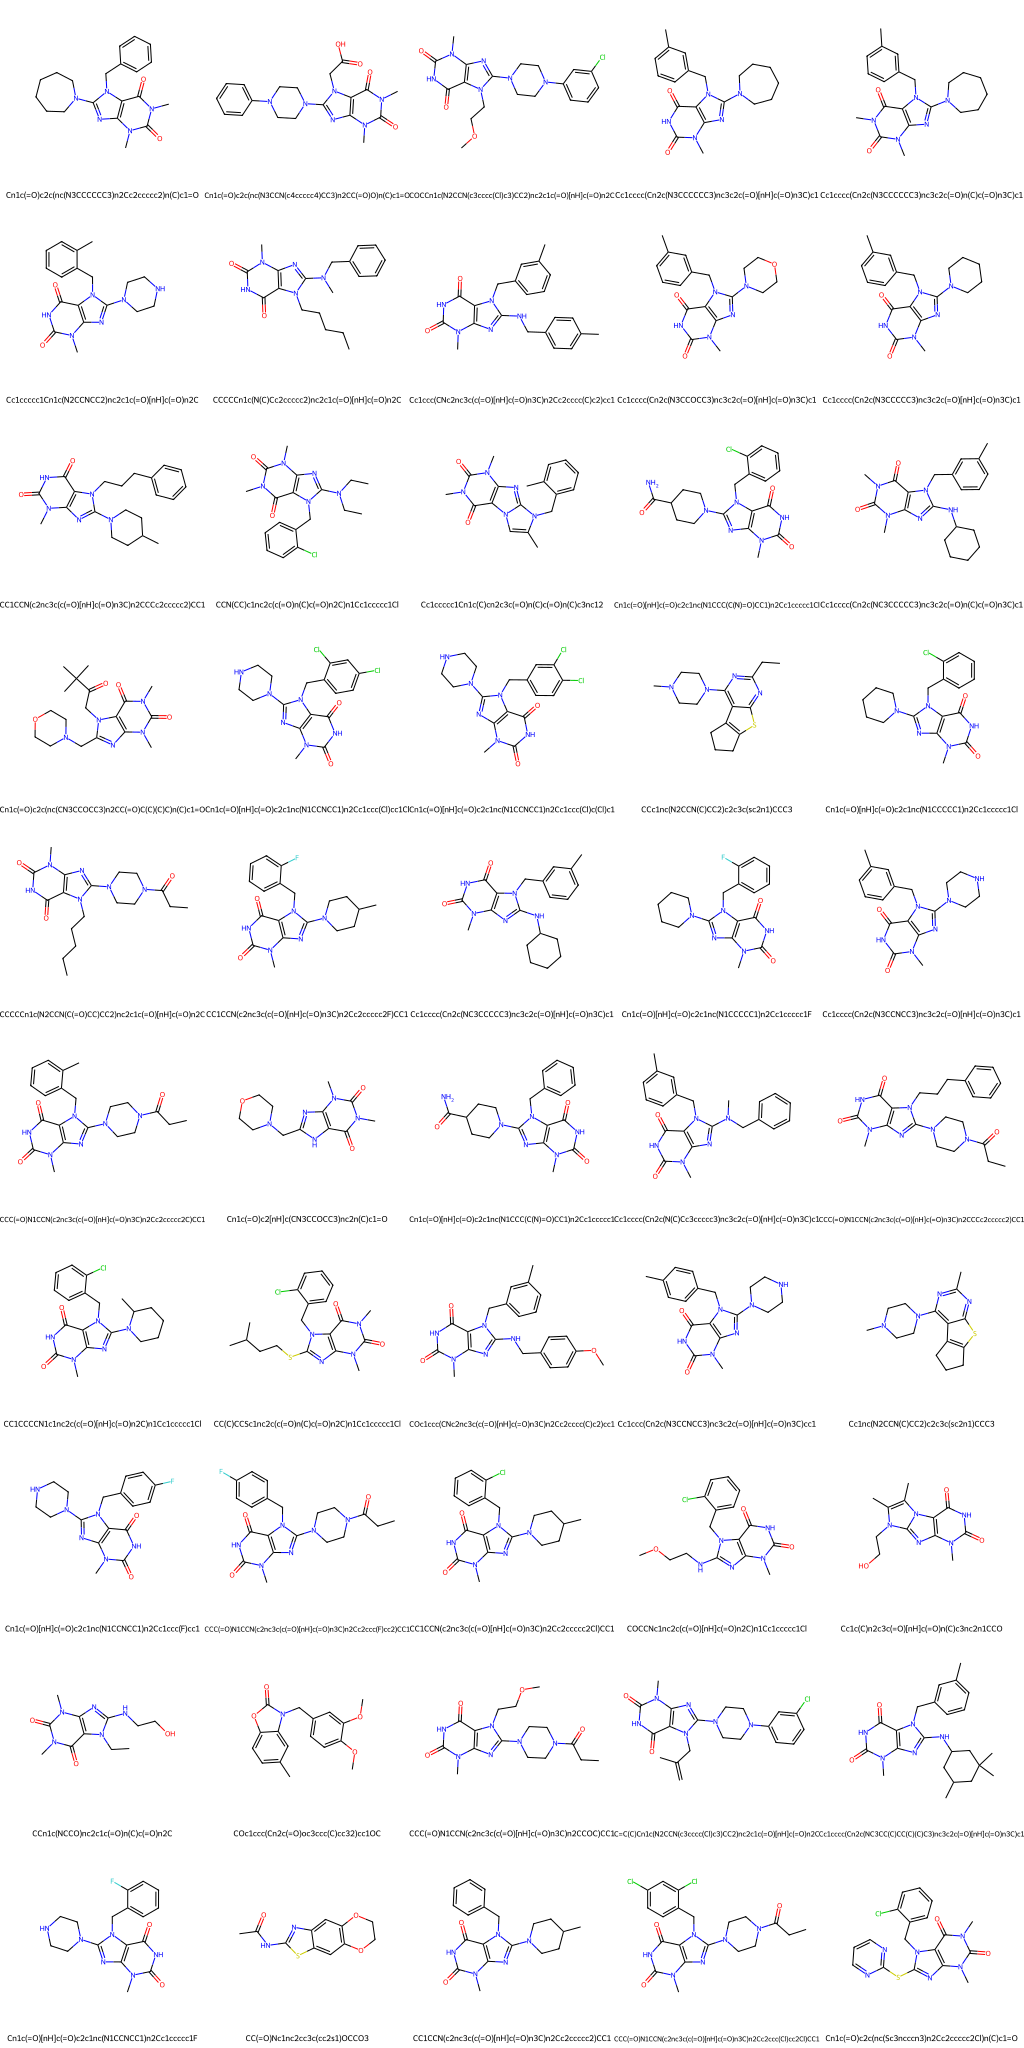

In [11]:
# visualize the molecules in the intersection of life_chemicals and merged_chemdiv_enamine
Draw.MolsToGridImage(list(life_chemicals_merged['mol']), molsPerRow=5, subImgSize=(400, 400), useSVG=True, legends=list(life_chemicals_merged['SMILES']))

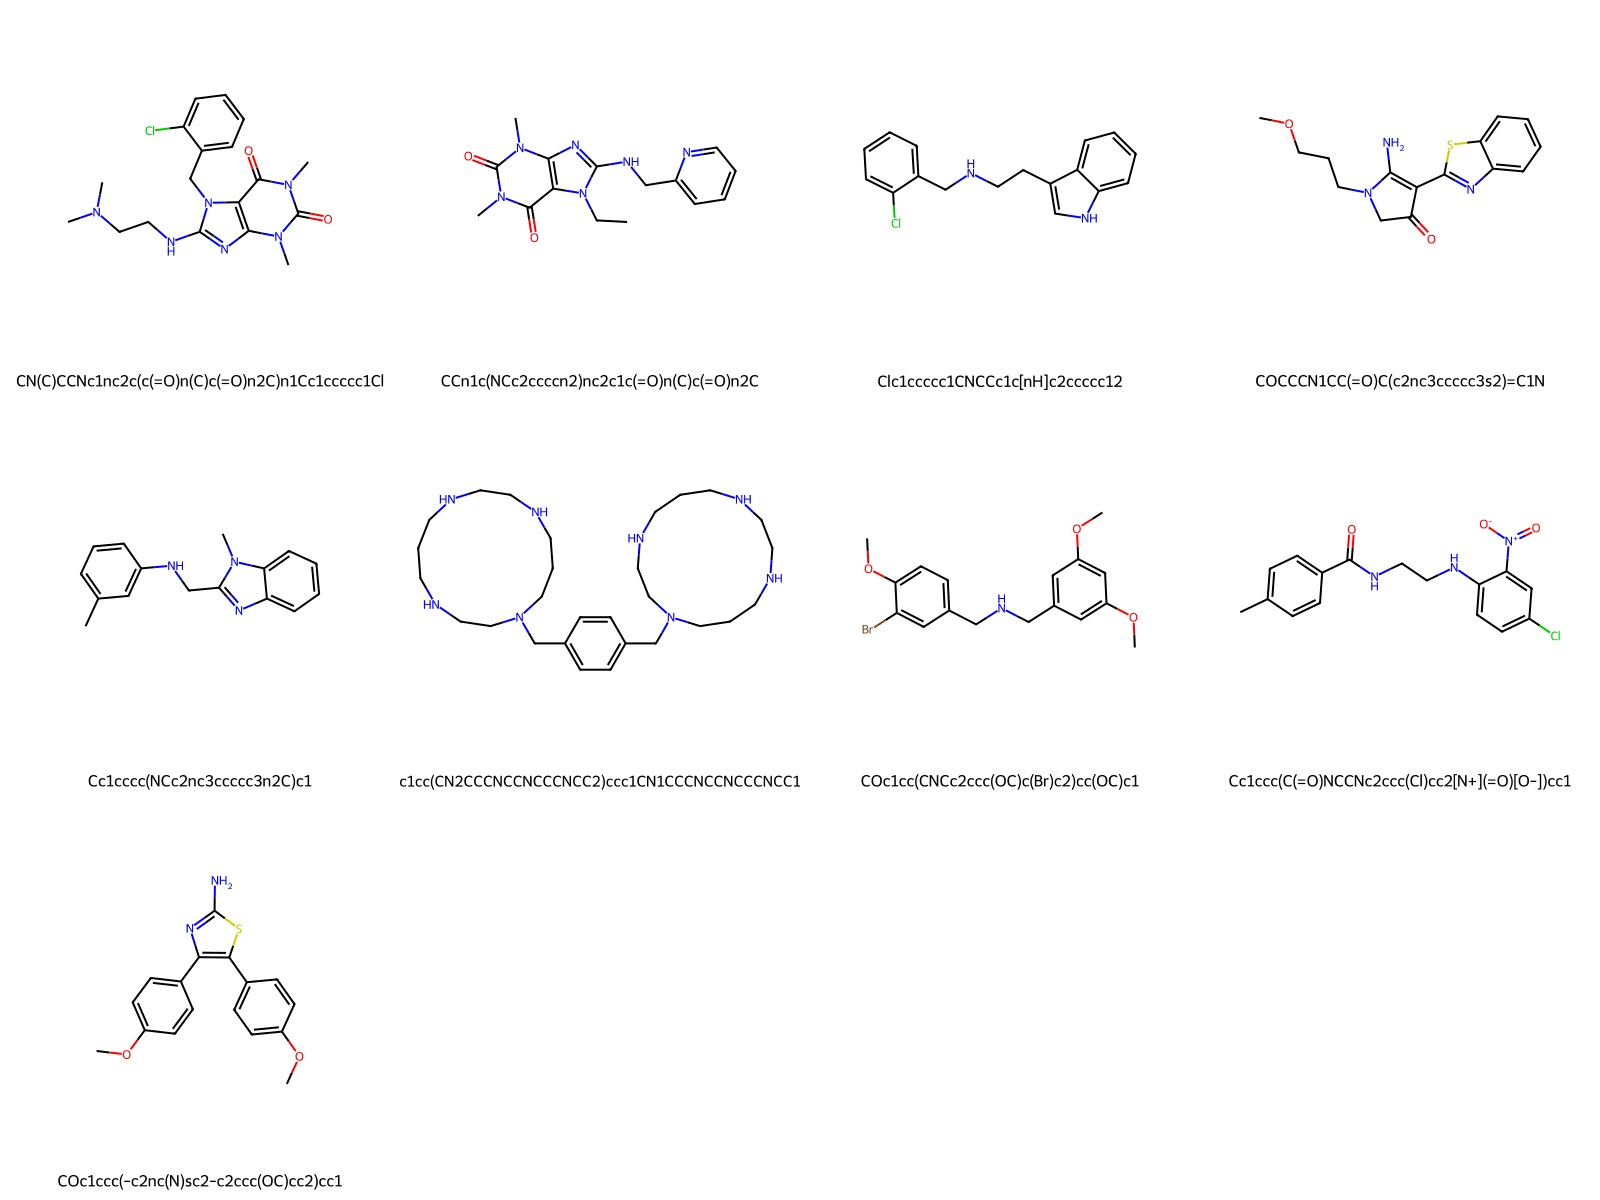

In [12]:
# visualize the molecules in the intersection of robin and merged_chemdiv_enamine
Draw.MolsToGridImage(list(robin_merged['mol']), molsPerRow=4, subImgSize=(400, 400), useSVG=True, legends=list(robin_merged['SMILES']))


In [13]:
# # visualize the molecules in the intersection of life_chemicals and robin and merged_chemdiv_enamine
# Draw.MolsToGridImage(list(all_rna_libs['mol']), molsPerRow=1, subImgSize=(400, 400), useSVG=True, legends=list(all_rna_libs['SMILES']))

In [14]:
# print out smiles of molecules in the intersection of life_chemicals and robin and merged_chemdiv_enamine
print(list(all_rna_libs['SMILES']))

[]


In [15]:
# # print this smiles  CN(C)CCNc1nc2c(c(=O)n(C)c(=O)n2C)n1Cc1ccccc1Cl and visualize it
# mol = MolFromSmiles('CN(C)CCNc1nc2c(c(=O)n(C)c(=O)n2C)n1Cc1ccccc1Cl')
# Draw.MolToImage(mol, size=(400, 400), useSVG=True)

In [16]:
# # print this smiles  Cn1c2c(c(=O)n(c1=O)C)n(c(n2)NCCN(C)C)Cc3ccccc3Cl and visualize it
# mol = MolFromSmiles('Cn1c2c(c(=O)n(c1=O)C)n(c(n2)NCCN(C)C)Cc3ccccc3Cl')
# Draw.MolToImage(mol, size=(400, 400), useSVG=True)


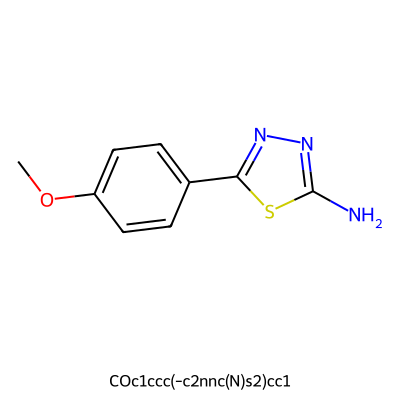

In [17]:
# visualize the molecules in the intersection of life_chemicals and robin
Draw.MolsToGridImage(list(life_chemicals_robin['mol']), molsPerRow=1, subImgSize=(400, 400), legends=list(life_chemicals_robin['SMILES']), useSVG=False)


In [18]:
# print out smiles of molecules in the intersection of life_chemicals_robin
print(list(life_chemicals_robin['SMILES']))

['COc1ccc(-c2nnc(N)s2)cc1']


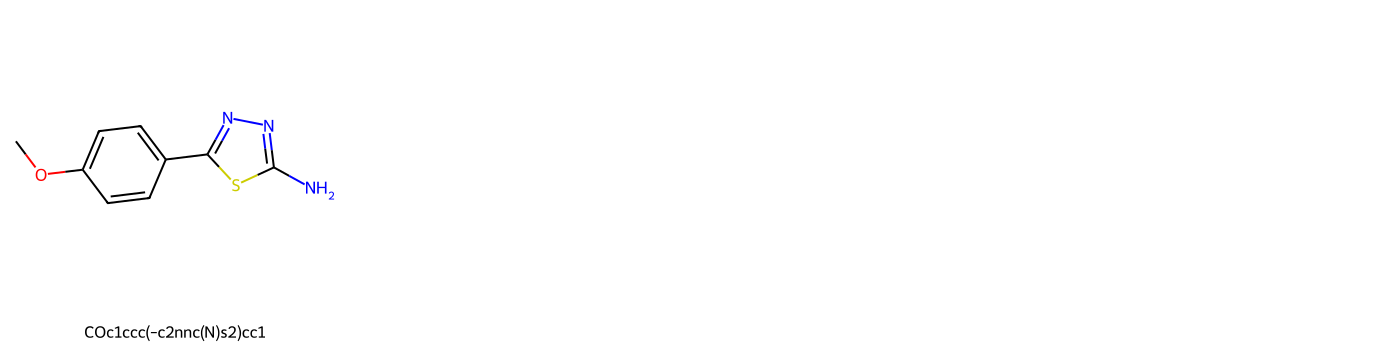

In [19]:
# visualize the molecules in the intersection of life_chemicals and robin
Draw.MolsToGridImage(list(life_chemicals_robin['mol']), molsPerRow=4, subImgSize=(350, 350), legends=list(life_chemicals_robin['SMILES']), useSVG=True)

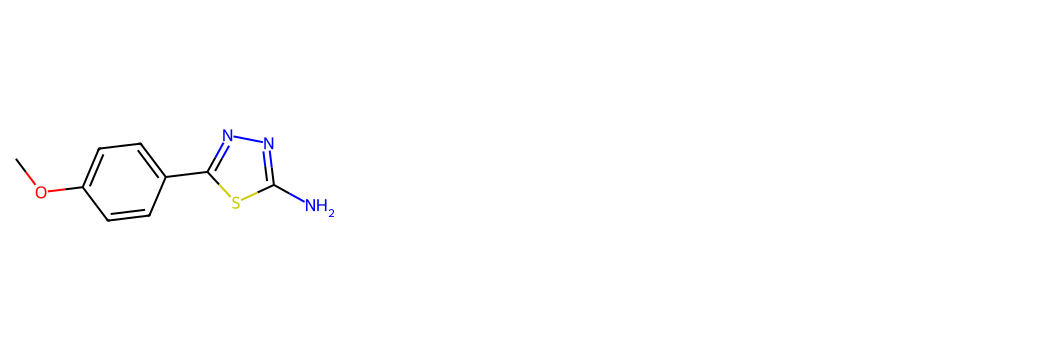

In [20]:
# visualize the molecules in the intersection of life_chemicals and robin
Draw.MolsToGridImage(list(life_chemicals_robin['mol']), molsPerRow=3, subImgSize=(350, 350), useSVG=True) # , legends=list(life_chemicals_robin['SMILES'])

In [21]:
# # visualize the molecules in the intersection of life_chemicals and chemdiv and enamine
# Draw.MolsToGridImage(list(life_chemicals_chemdiv_enamine['mol'][:12]), molsPerRow=4, subImgSize=(350, 200), useSVG=True) # , legends=list(life_chemicals_chemdiv_enamine['SMILES'])

In [22]:
# # visualize the molecules in the intersection of Protein-Targeted Enamine & Merged RNA-Targeted Libraries
# Draw.MolsToGridImage(list(protein_all_rna['mol'][:12]), molsPerRow=5, subImgSize=(350, 200), useSVG=True) # legends=list(protein_all_rna['SMILES']),